# Stakeholder Questions

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline

In [2]:
#importing cvs files and saving them under a variable
kc_house_df = pd.read_csv("kc_df_cleaned.csv")
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long
0,538000.0,3,2570,7242,2.0,3,7,98125,47.7210,-122.319
1,180000.0,2,770,10000,1.0,3,6,98028,47.7379,-122.233
2,604000.0,4,1960,5000,1.0,5,7,98136,47.5208,-122.393
3,510000.0,3,1680,8080,1.0,3,8,98074,47.6168,-122.045
4,257500.0,3,1715,6819,2.0,3,7,98003,47.3097,-122.327


***
## Question 1: What are the Top 20 Zipcodes in Terms of Price of Home?

First I will group the dataframe by zipcodes and sort the values by price

In [3]:
grouped_df = kc_house_df.groupby(['zipcode']).sum().reset_index()

df = grouped_df.sort_values('price', axis = 0, ascending=False).reset_index(drop=True)



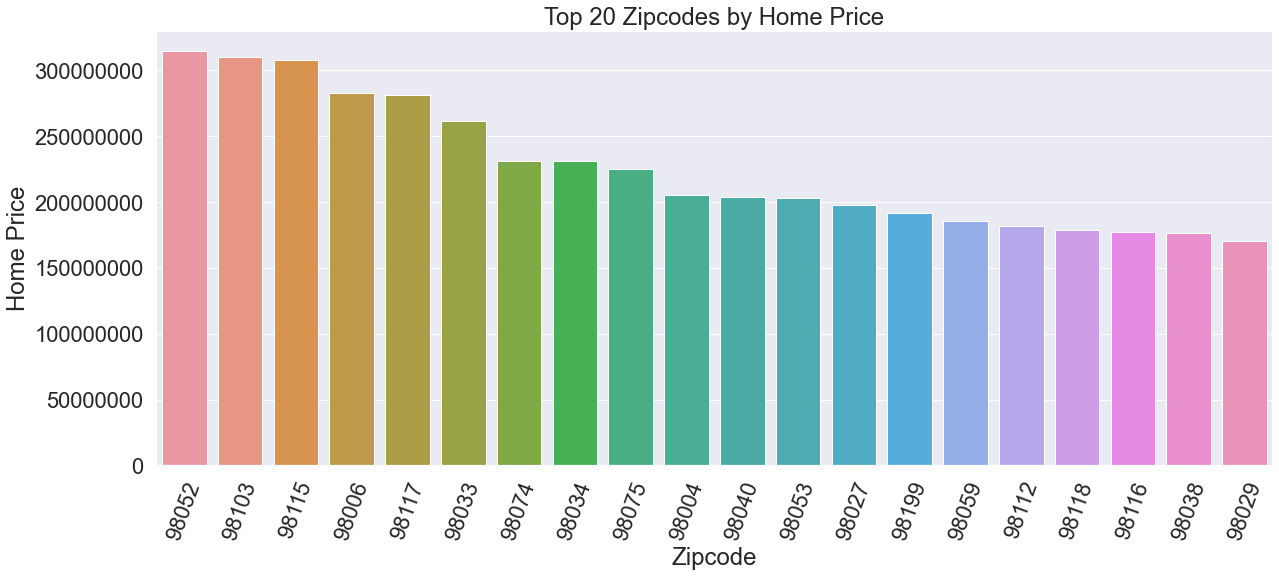

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set_style('darkgrid')
palette = sns.set_palette("husl", 8)

ax = sns.barplot(x=df.head(20)['zipcode'], y=df.head(20)['price'], order = df.head(20)['zipcode'])
ax.set(xlabel='Zipcode', ylabel='Home Price')
plt.ticklabel_format(style='plain', axis= 'y')
plt.xticks(rotation=70)
plt.title('Top 20 Zipcodes by Home Price')
sns.set(font_scale=2.0)
plt.show()

***
## Question 2: What Grade of Homes Sell at the Highest Price?

In [5]:
kc_house_df['grade'].unique()

array([ 7,  6,  8,  9, 11, 10,  5])

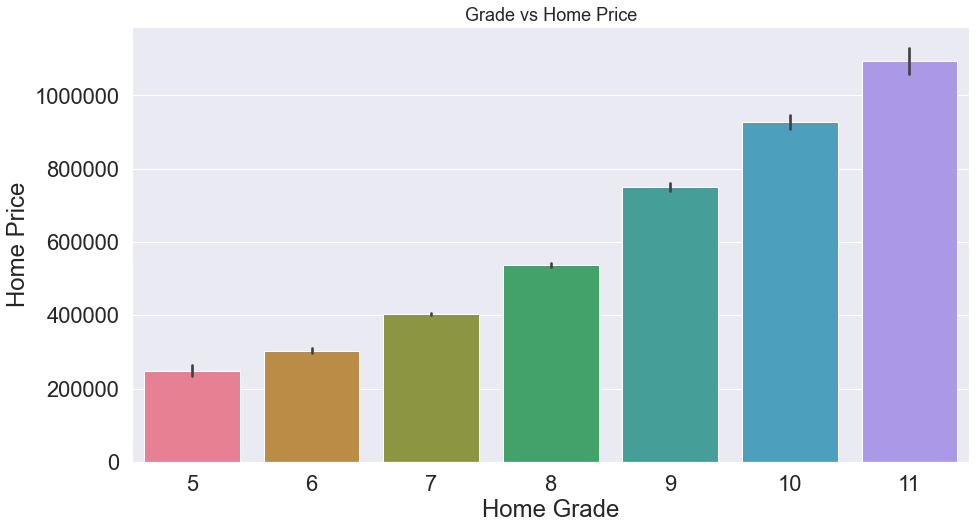

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
palette = sns.set_palette("husl", 8)
ax = sns.barplot(data=kc_house_df, x = "grade", y = "price")
ax.set(xlabel='Home Grade', 
       ylabel='Home Price')
plt.title('Grade vs Home Price')
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

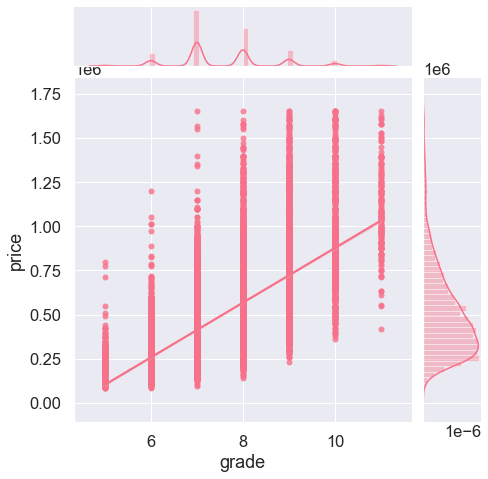

In [7]:
sns.jointplot('grade', 'price', data=kc_house_df, kind='reg', height = 7)
sns.set(font_scale=1.5)

In [8]:
grd_vs_avg_price = kc_house_df.groupby('grade')['price'].mean()

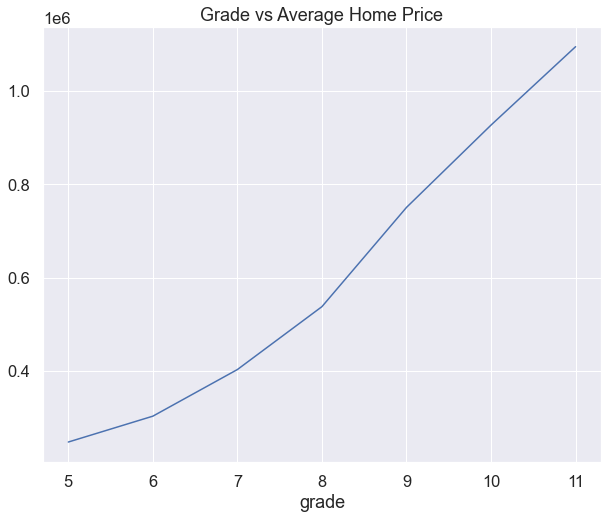

In [9]:
grd_vs_avg_price.plot(figsize=(10,8))
ax.set(xlabel='Grade', ylabel='Average Home Price')
plt.title('Grade vs Average Home Price')
plt.show()

***
## Question 3: What Condition of Homes Sell at the Highest Price?

In [10]:
kc_house_df['condition'].unique()

array([3, 5, 4, 2])

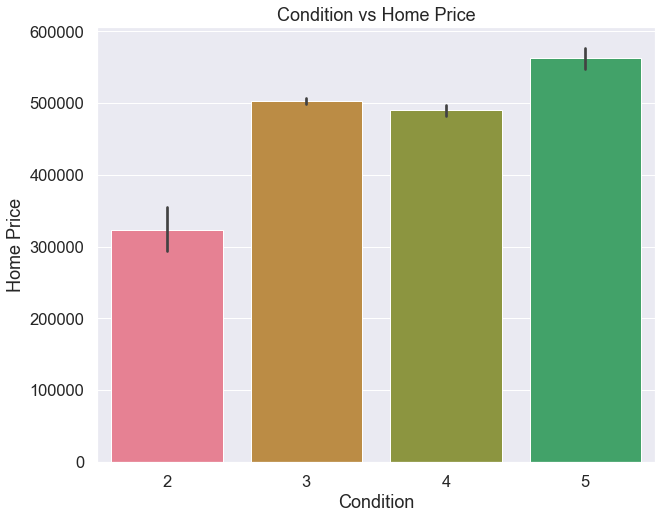

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
palette = sns.set_palette("husl", 8)
ax = sns.barplot(data=kc_house_df, x = "condition", y = "price")
ax.set(xlabel='Condition', ylabel='Home Price')
plt.title('Condition vs Home Price')
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

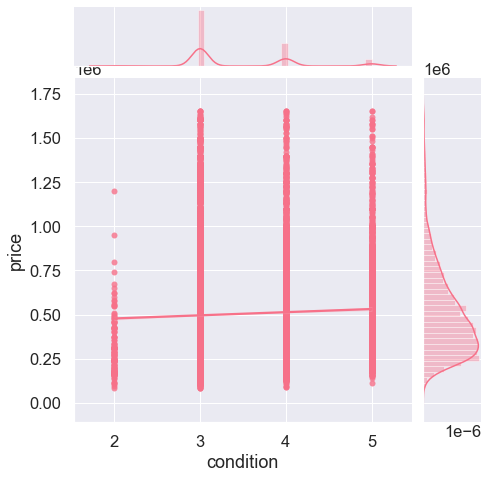

In [12]:
sns.jointplot('condition', 'price', data=kc_house_df, kind='reg', height = 7)
sns.set(font_scale=1.5)